In [ ]:
# 30일치 데이터 합치기
import pandas as pd

target_date = ['2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04', '2022-06-05',
               '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
               '2022-06-11', '2022-06-12', '2022-06-13', '2022-06-14', '2022-06-15',
               '2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19', '2022-06-20',
               '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24', '2022-06-25',
               '2022-06-26', '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30']

folder_path_3 = "C:/sh/study/krx데이콘/krx_2022/sh/data/score"

for date in target_date:
  df_day = pd.read_csv(folder_path_3 + "/" + date + "_score.csv")[["날짜","score"]]
  df_day = df_day[df_day["날짜"] == date]
  df_mean = df_day.groupby("날짜").mean()
  df_mean["score"].iloc[0] = (df_mean["score"].iloc[0]/2) + 50
  print(df_mean)
  if target_date.index(date) == 0:
    df_score = df_mean
  else:
    df_score = pd.concat([df_score,df_mean])

In [129]:
import pandas as pd

df_score = pd.read_csv("2022-06_score.csv")
df_score.set_index("날짜",inplace = True)

In [130]:
from pykrx import stock

df = stock.get_index_fundamental("20220601", "20220630", "1001")
df["날짜"] = df.index.astype("str")
df.set_index("날짜",inplace=True)

In [131]:
data_1 = pd.merge(df, df_score, how='outer', on=None,left_index=True,right_index=True)

In [132]:
data_1 = data_1[["등락률","종가","score"]]

In [133]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

x = data_1.values

scaler = MinMaxScaler()

x_scaled_1 = scaler.fit_transform(x)
df_s_1 = pd.DataFrame(x_scaled_1)

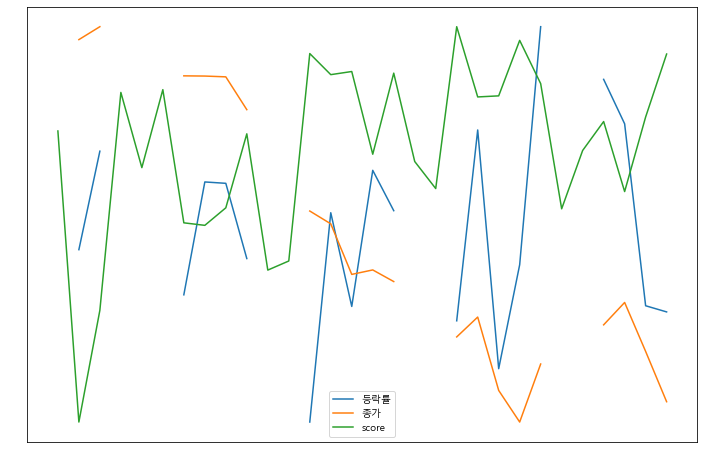

In [141]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(df_s_1[0],label = "등락률")
plt.plot(df_s_1[1],label = "종가")
plt.plot(df_s_1[2],label = "score")
plt.legend()
plt.tick_params(color = 'white',colors = 'white')

In [135]:
data_2 = pd.merge(df, df_score, on=None,left_index=True,right_index=True)

In [136]:
data_2 = data_2[["등락률","종가","score"]]

In [137]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

x = data_2.values

scaler = MinMaxScaler()

x_scaled_2 = scaler.fit_transform(x)
df_s_2 = pd.DataFrame(x_scaled_2)

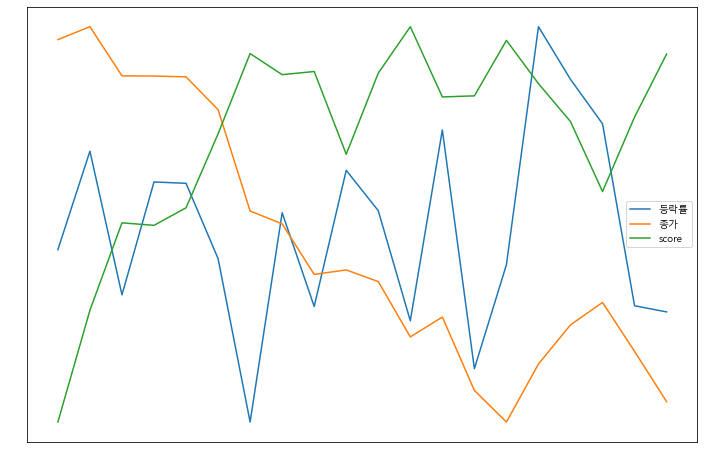

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(df_s_2[0],label = "등락률")
plt.plot(df_s_2[1],label = "종가")
plt.plot(df_s_2[2],label = "score")
plt.legend()
plt.tick_params(color = 'white',colors = 'white')